# Ordinary Least Squares on Time

[▲ Overview](0.0-Overview.ipynb)

[◀ Data Exploration](3.0-Exploring-timeseries.ipynb)

[▶ Quadratic Model](4.1-Quadractic-model.ipynb)

The main class of models investigated in this exercise is simple OLS on functions of time, i.e. the response $y(t)$ is modelled as
$$y(t) = \sum_{i=0}^n \beta_i \cdot f_i(t) + \epsilon_t$$
where $f_i$ are functions of the time, weighted by the parameters $\beta_i$ (to be estimated by OLS) and $\epsilon_t$ denotes the error term. This class of models can capture time-dependent changes and seasonality (dependending on the regressor functions), but it completely ignores autocorrelation, i.e. cross-temporal dependencies.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
from australian_housing import paths
from australian_housing.models.ols_model import polynom_regressor, fit_ols, history_and_prediction_plot

In [3]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])

In [4]:
help(polynom_regressor)

Help on function polynom_regressor in module australian_housing.models.ols_model:

polynom_regressor(order)
    Returns a regressor function containing a polynom of order order.



## Linear Model
The simplest type in the OLS class of models is the linear model with $f_0(t) = 1$ and $f_1(t) = t$, i.e. $y(t)$ is modelled as $y(t) = \beta_0 + \beta_1 \cdot t$.

In [5]:
regr = polynom_regressor(order=1)

In [6]:
model_fit = fit_ols(ts, regr)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     138.3
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           2.46e-18
Time:                        20:34:03   Log-Likelihood:                -515.72
No. Observations:                  73   AIC:                             1035.
Df Residuals:                      71   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.51e+05   3.85e+04    -11.709      0.000   -5.28e+05   -3.74e+05
x1           224.8636     19.119     11.761      0.000     186.742     262.985
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.365
Skew:                          -0.808   Prob(JB):                      0.00207
Kurtosis:                       4.206   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

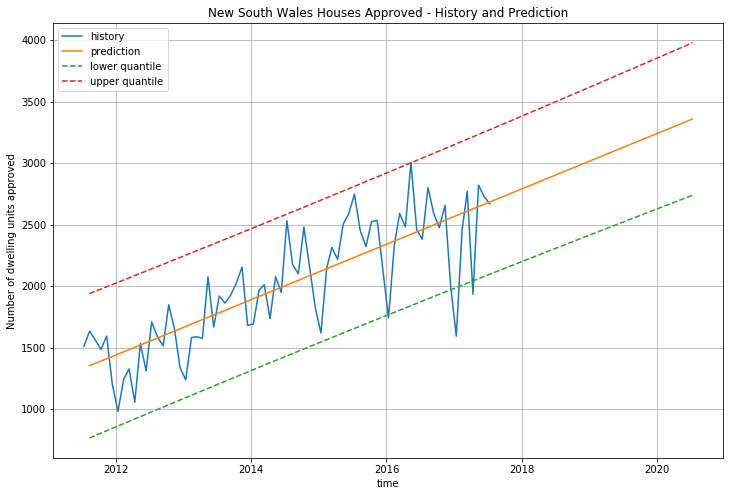

In [7]:
fig = plt.figure(figsize=(12,8))
history_and_prediction_plot(fig, ts, model_fit, regr, '2020-07-01', 'M', 0.05);

The plot of the linear model shows a non-surprising upwards trend. It cannot capture the diminishing growth in 2017. The confidence intervals cannot capture the increasing uncertainty of future predictions as with all OLS models.

The summary of the model fit shows highly significant intercept and slope. $R^2$ at 66% indicates a notable amount of variation cannot be explained by this model. There is also a warning about multicollinearity; this is inherent to the OLS approach on functions of the time axis and cannot easily fixed. 

### Residual Analysis

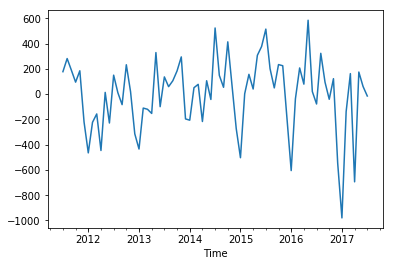

In [8]:
model_fit.resid.plot();

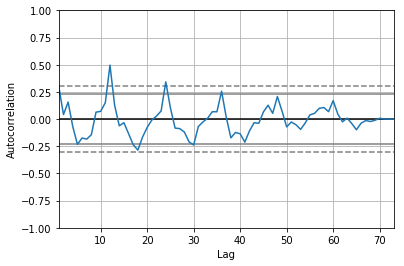

In [9]:
autocorrelation_plot(model_fit.resid);

Autocorrelation of the residuals is comparable to the original time series. This means that we do not capture any seasonality using this model (which is expected).

Adding a quadratic term to the linear model with allows to capture a curvature in time trend. This can be found in [Quadratic Model](4.1-Quadractic-model.ipynb).

[▲ Overview](0.0-Overview.ipynb)

[◀ Data Exploration](3.0-Exploring-timeseries.ipynb)

[▶ Quadratic Model](4.1-Quadractic-model.ipynb)